## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.layers import Dense, BatchNormalization
from keras import regularizers

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

# def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
#     input_layer = keras.layers.Input(input_shape)
    
#     for i, n_units in enumerate(num_neurons):
#         if i == 0:
# #             input_layer = BatchNormalization()(input_layer)
#             x = keras.layers.Dense(units=n_units, 
#                                    activation="relu", 
#                                    name="hidden_layer"+str(i+1))(input_layer)
#             x = BatchNormalization()(x)
#         else:
# #             x = BatchNormalization()(x)

#             x = keras.layers.Dense(units=n_units, 
#                                    activation="relu", 
#                                    name="hidden_layer"+str(i+1))(x)
            
#             x = BatchNormalization()(x)

#     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
#     model = keras.models.Model(inputs=[input_layer], outputs=[out])
#     return model

In [6]:
def build_mlp(n_size, out_n, regularizer, regularizer_ratio=''):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=x_train.shape[1:])
    
    for i, j in enumerate(n_size):
        if i == 0:
            x =  keras.layers.Dense(j, 
                                    activation = 'relu',
                                    kernel_regularizer=regularizer(regularizer_ratio))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(j, activation = 'relu',)(x)
    
    out = keras.layers.Dense(out_n, activation = 'relu',)(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])   
    return model

In [13]:
"""Code Here
設定超參數
"""
b_size = [64, 128, 256]
n_size = [256, 128, 64, 64]
out_n = 10
EPOCHS = 50
re = [regularizers.l1, regularizers.l2]
regularizer_ratio = 0.004

In [21]:
r.__name__

'l1'

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in b_size:
    for r in re:
        model = build_mlp(n_size=n_size, out_n=out_n, regularizer=r, regularizer_ratio=regularizer_ratio)
        optimizer = keras.optimizers.Adam()
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=b, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = f"{b}_{r.__name__}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 30s 605us/step - loss: 47.4231 - accuracy: 0.2106 - val_loss: 13.6625 - val_accuracy: 0.1400
Epoch 2/50
50000/50000 [==============================] - 25s 507us/step - loss: 16.1481 - accuracy: 0.2171 - val_loss: 15.5972 - val_accuracy: 0.1521
Epoch 3/50
50000/50000 [==============================] - 27s 538us/step - loss: 19.9832 - accuracy: 0.2273 - val_loss: 17.3034 - val_accuracy: 0.1261oss: 19.9551 
Epoch 4/50
50000/50000 [==============================] - 28s 556us/step - loss: 29.7303 - accuracy: 0.2249 - val_loss: 10.3536 - val_accuracy: 0.1016
Epoch 5/50
50000/50000 [==============================] - 22s 431us/step - loss: 8.6671 - accuracy: 0.2434 - val_loss: 8.1408 - val_accuracy: 0.1387
Epoch 6/50
50000/50000 [==============================] - 27s 543us/step - loss: 8.6018 - accuracy: 0.2522 - val_loss: 9.5881 - val_accuracy: 0.1522
Epoch 7/50
50000/50000 [===========

Epoch 5/50
50000/50000 [==============================] - 18s 354us/step - loss: 3.7189 - accuracy: 0.2598 - val_loss: 3.9237 - val_accuracy: 0.1311
Epoch 6/50
50000/50000 [==============================] - 19s 372us/step - loss: 3.8972 - accuracy: 0.2626 - val_loss: 5.1224 - val_accuracy: 0.1879
Epoch 7/50
50000/50000 [==============================] - 18s 357us/step - loss: 4.3125 - accuracy: 0.2812 - val_loss: 4.1597 - val_accuracy: 0.1902
Epoch 8/50
50000/50000 [==============================] - 18s 356us/step - loss: 3.7578 - accuracy: 0.3028 - val_loss: 3.9471 - val_accuracy: 0.1857
Epoch 9/50
50000/50000 [==============================] - 19s 378us/step - loss: 4.7228 - accuracy: 0.2576 - val_loss: 4.6262 - val_accuracy: 0.1575
Epoch 10/50
50000/50000 [==============================] - 17s 349us/step - loss: 4.4097 - accuracy: 0.2520 - val_loss: 4.5076 - val_accuracy: 0.2066
Epoch 11/50
50000/50000 [==============================] - 18s 366us/step - loss: 4.0695 - accuracy: 0.26

50000/50000 [==============================] - 10s 201us/step - loss: 17.9560 - accuracy: 0.2650 - val_loss: 106.8980 - val_accuracy: 0.1216
Epoch 10/50
50000/50000 [==============================] - 10s 197us/step - loss: 22.2708 - accuracy: 0.2570 - val_loss: 7.8377 - val_accuracy: 0.1575
Epoch 11/50
50000/50000 [==============================] - 10s 203us/step - loss: 8.7015 - accuracy: 0.2658 - val_loss: 19.4210 - val_accuracy: 0.1055
Epoch 12/50
50000/50000 [==============================] - 10s 195us/step - loss: 9.2065 - accuracy: 0.2701 - val_loss: 6.5409 - val_accuracy: 0.1472
Epoch 13/50
50000/50000 [==============================] - 10s 196us/step - loss: 9.5975 - accuracy: 0.2751 - val_loss: 6.6349 - val_accuracy: 0.1826
Epoch 14/50
50000/50000 [==============================] - 10s 194us/step - loss: 13.2492 - accuracy: 0.2736 - val_loss: 6.8522 - val_accuracy: 0.1445
Epoch 15/50
50000/50000 [==============================] - 10s 197us/step - loss: 6.5608 - accuracy: 0.277

50000/50000 [==============================] - 11s 220us/step - loss: 4.1726 - accuracy: 0.2688 - val_loss: 4.0022 - val_accuracy: 0.1994
Epoch 14/50
50000/50000 [==============================] - 12s 243us/step - loss: 3.7124 - accuracy: 0.3041 - val_loss: 3.9333 - val_accuracy: 0.1629
Epoch 15/50
50000/50000 [==============================] - 10s 195us/step - loss: 3.5806 - accuracy: 0.3226 - val_loss: 4.2416 - val_accuracy: 0.1009
Epoch 16/50
50000/50000 [==============================] - 11s 215us/step - loss: 3.4750 - accuracy: 0.3218 - val_loss: 3.6646 - val_accuracy: 0.1622
Epoch 17/50
50000/50000 [==============================] - 13s 263us/step - loss: 3.6258 - accuracy: 0.3023 - val_loss: 3.5527 - val_accuracy: 0.2347
Epoch 18/50
50000/50000 [==============================] - 12s 234us/step - loss: 3.4950 - accuracy: 0.3243 - val_loss: 3.7347 - val_accuracy: 0.2070
Epoch 19/50
50000/50000 [==============================] - 11s 223us/step - loss: 3.3231 - accuracy: 0.3413 - va

50000/50000 [==============================] - 7s 141us/step - loss: 22.0454 - accuracy: 0.2549 - val_loss: 37.6195 - val_accuracy: 0.1368
Epoch 18/50
50000/50000 [==============================] - 8s 152us/step - loss: 12.1062 - accuracy: 0.2730 - val_loss: 6.7491 - val_accuracy: 0.1663
Epoch 19/50
50000/50000 [==============================] - 7s 136us/step - loss: 17.2672 - accuracy: 0.2715 - val_loss: 7.2045 - val_accuracy: 0.1440
Epoch 20/50
50000/50000 [==============================] - 7s 144us/step - loss: 6.3216 - accuracy: 0.2798 - val_loss: 5.9948 - val_accuracy: 0.2108
Epoch 21/50
50000/50000 [==============================] - 7s 137us/step - loss: 8.5845 - accuracy: 0.2778 - val_loss: 6.8453 - val_accuracy: 0.1731
Epoch 22/50
50000/50000 [==============================] - 8s 159us/step - loss: 17.7057 - accuracy: 0.2745 - val_loss: 7.0770 - val_accuracy: 0.1126
Epoch 23/50
50000/50000 [==============================] - 7s 133us/step - loss: 26.3331 - accuracy: 0.2549 - val

50000/50000 [==============================] - 8s 156us/step - loss: 2.2309 - accuracy: 0.3166 - val_loss: 2.4564 - val_accuracy: 0.1996
Epoch 22/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.2059 - accuracy: 0.3244 - val_loss: 2.5532 - val_accuracy: 0.1023
Epoch 23/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1354 - accuracy: 0.3216 - val_loss: 2.2367 - val_accuracy: 0.2141
Epoch 24/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0060 - accuracy: 0.3372 - val_loss: 2.5513 - val_accuracy: 0.2241
Epoch 25/50
50000/50000 [==============================] - 8s 154us/step - loss: 4.0045 - accuracy: 0.2133 - val_loss: 4.3220 - val_accuracy: 0.1778
Epoch 26/50
50000/50000 [==============================] - 7s 132us/step - loss: 3.5524 - accuracy: 0.2780 - val_loss: 3.3223 - val_accuracy: 0.1764
Epoch 27/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.9324 - accuracy: 0.2999 - val_loss:

In [23]:
results

{'64_l1': {'train-loss': [47.42309218505859,
   16.148120229492186,
   19.983232033691408,
   29.73034248046875,
   8.667123451843262,
   8.601839721679687,
   8.74421715927124,
   9.788999541015626,
   8.927599233703614,
   11.473328469848633,
   8.700288312225341,
   8.764906112670898,
   8.769586018066406,
   8.98903299407959,
   8.852973576049804,
   11.924204956665038,
   8.611218294677734,
   16.184060181274415,
   8.399144844360352,
   9.134926850128174,
   11.933867083129883,
   8.603843907165528,
   8.072684559020995,
   8.419552137756348,
   8.278876485290528,
   8.458299198303223,
   8.443283036499023,
   8.457889572296143,
   8.551925754241944,
   8.386934040222169,
   8.015792719421388,
   10.855324580078126,
   16.00919348815918,
   8.136860506286622,
   7.640528026733398,
   8.398418520507812,
   7.687839851226807,
   7.732188826293945,
   7.7688324887084965,
   8.048390573425293,
   7.936982046813965,
   7.960162970581055,
   7.909573096008301,
   7.79265641494751,
   7

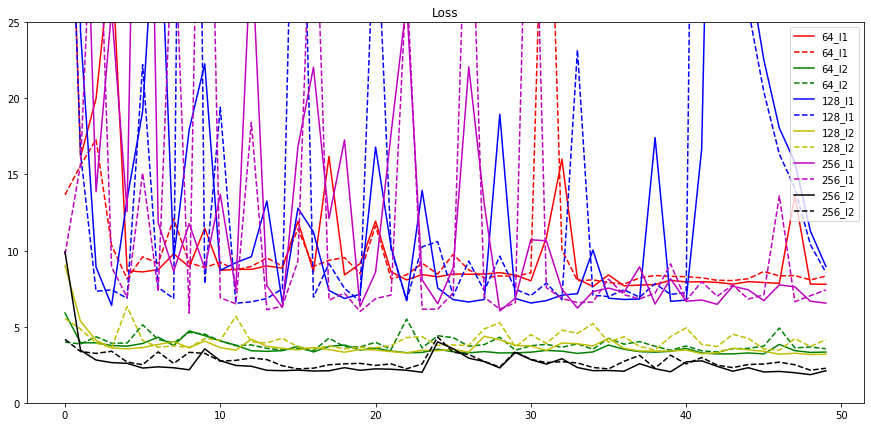

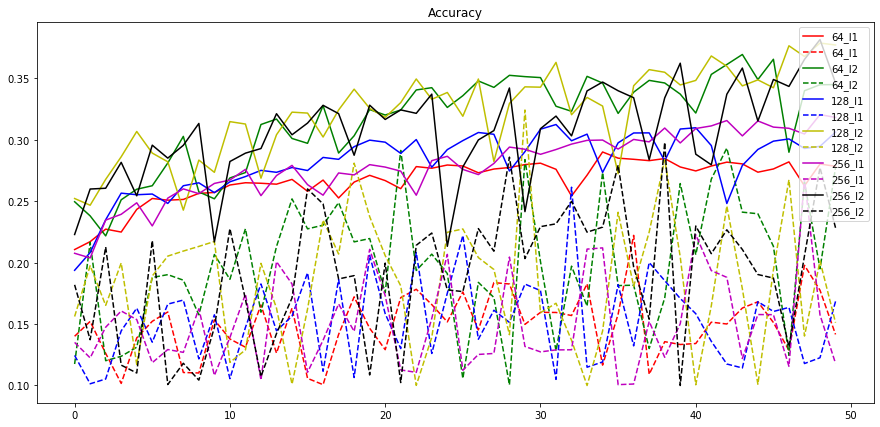

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 25])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=1)
plt.show()